# Data Visualization Project
### An Exploratory Health and Fitness Data Analysis using Smart Watch 
Project By:   
Akshya Ramesh, Rathnapriya Gopalakrishnan, Gokul Ragunandhan Narayanasamy 

#### Data Preprocessing
We import the dataset, rename a few columns, make a few adjustments, and drop null values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aw_fb_data.csv')
df.head()

Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   
1          1.000000   19.453390            0.137967       1.000000   
2          1.000000   19.540825            0.138587       1.000000   
3          1.000000   19.628260            0.139208       1.000000   
4          0.982816   19.715695            0.139828       0.241567   

   steps_times_distance       device activity  
0              0.089692  apple watch    Lying  
1              0.102088  apple watch    Lying  
2              0.115287  apple watch    Lying  
3              0.129286  apple watch    Lying  
4              0.144088  apple watch    Lying

In [3]:
df  = df.rename(columns={'hear_rate':'heart_rate'})

In [4]:
df['activity_heart_rate']=df['heart_rate']

In [5]:
df[df['device']=='apple watch']['activity_heart_rate']=df['heart_rate']+df['resting_heart']

C:\Users\Priya\AppData\Local\Temp\ipykernel_2872\2706613017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['device']=='apple watch']['activity_heart_rate']=df['heart_rate']+df['resting_heart']


In [6]:
df.loc[df['device']=='apple watch','activity_heart_rate']=df['heart_rate']+df['resting_heart']

In [7]:
df['device']=df['device'].str.title()

In [8]:
df.head()

Unnamed: 0  X1  age  gender  height  weight      steps  heart_rate  \
0           1   1   20       1   168.0    65.4  10.771429   78.531302   
1           2   2   20       1   168.0    65.4  11.475325   78.453390   
2           3   3   20       1   168.0    65.4  12.179221   78.540825   
3           4   4   20       1   168.0    65.4  12.883117   78.628260   
4           5   5   20       1   168.0    65.4  13.587013   78.715695   

    calories  distance  ...  entropy_setps  resting_heart  corr_heart_steps  \
0   0.344533  0.008327  ...       6.116349           59.0          1.000000   
1   3.287625  0.008896  ...       6.116349           59.0          1.000000   
2   9.484000  0.009466  ...       6.116349           59.0          1.000000   
3  10.154556  0.010035  ...       6.116349           59.0          1.000000   
4  10.825111  0.010605  ...       6.116349           59.0          0.982816   

   norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
0   19.531302            0.138520       1.000000              0.089692   
1   19.453390            0.137967       1.000000              0.102088   
2   19.540825            0.138587       1.000000              0.115287   
3   19.628260            0.139208       1.000000              0.129286   
4   19.715695            0.139828       0.241567              0.144088   

        device activity activity_heart_rate  
0  Apple Watch    Lying          137.531302  
1  Apple Watch    Lying          137.453390  
2  Apple Watch    Lying          137.540825  
3  Apple Watch    Lying          137.628260  
4  Apple Watch    Lying          137.715695  

[5 rows x 21 columns]

In [9]:
df = df.drop(df.columns.tolist()[0],axis=1)

In [10]:
df.isna().sum()[:5]

X1        0
age       0
gender    0
height    0
weight    0
dtype: int64

# Data Visualizations

## Visualizing the difference in the heart rate across six activities for apple watch




Text(0.5, 1.0, 'Visualizing the spread of heart rate across activities for apple watch')

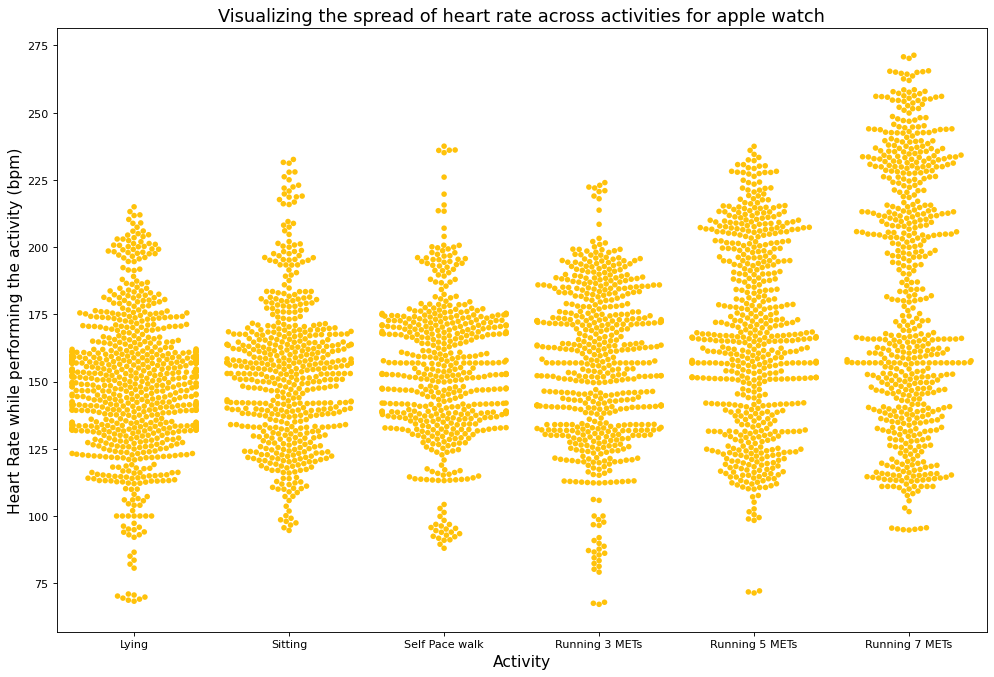

In [11]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10), dpi=80)
sns.swarmplot(data=df[df['device']=='Apple Watch'], x="activity", y="activity_heart_rate", color = '#FFC20A')
plt.legend([],[], frameon=False)

plt.xlabel("Activity",size=14)
plt.ylabel("Heart Rate while performing the activity (bpm)",size=14)
plt.title("Visualizing the spread of heart rate across activities for apple watch", size=16)


## Visualizing the difference in the heart rate across six activities for fitbit watch

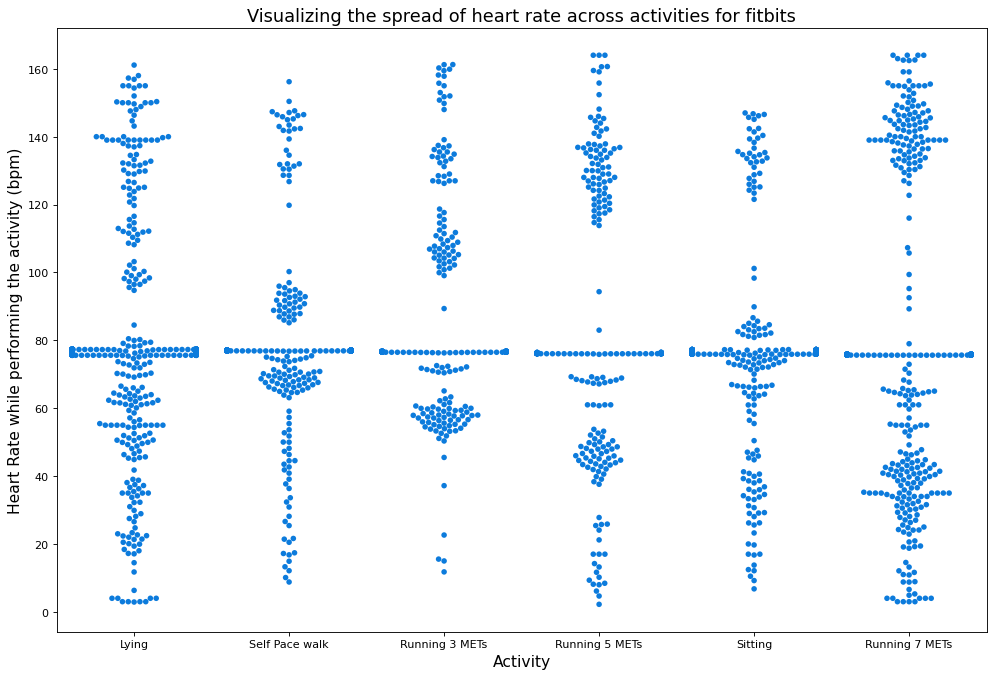

In [12]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10), dpi=80)
sns.swarmplot(data=df[df['device']=='Fitbit'], x="activity", y="activity_heart_rate", color = '#0C7BDC')
plt.xlabel("Activity",size=14)
plt.ylabel("Heart Rate while performing the activity (bpm)",size=14)
plt.title("Visualizing the spread of heart rate across activities for fitbits", size=16)
plt.legend([],[], frameon=False)


## Visualizing the distribution of heart rate across different activities for Apple Watches and Fitbit 

<Figure size 864x576 with 0 Axes>

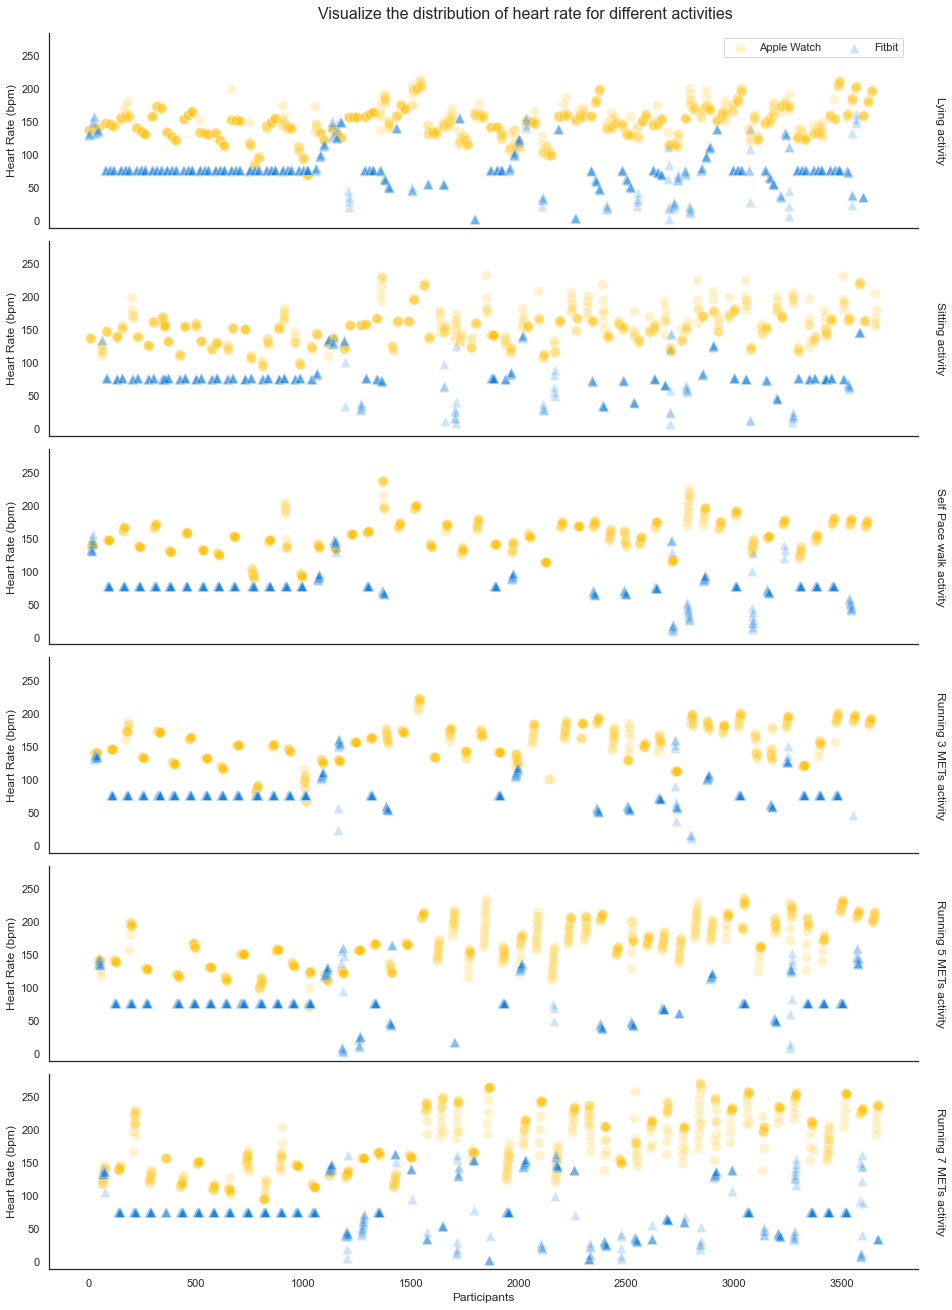

In [13]:
plt.figure(figsize=(12,8))
d = { "marker" : ["o", "^"], 'color':['#FFC20A','#0C7BDC'],"s":[100,100], "alpha":[0.2,0.2]}
sns.set(font_scale=1)
sns.set_theme(style='white')
g = sns.FacetGrid(df, row='activity', hue='device', hue_kws=d, margin_titles=True,height=3, aspect= 4.5)
g.map(sns.scatterplot,"X1", "activity_heart_rate")
g.fig.suptitle('Visualize the distribution of heart rate for different activities', y=1.01, size=16)
g.add_legend()
sns.move_legend(g, "upper left",  bbox_to_anchor=(0.68, 0.99), title=None, frameon=True, ncol=2)
g.set_axis_labels("Participants", "Heart Rate (bpm)")
g.set_titles(row_template="{row_name} activity")


## Visualizing the distribution of calorie burn for apple watches and fitbits

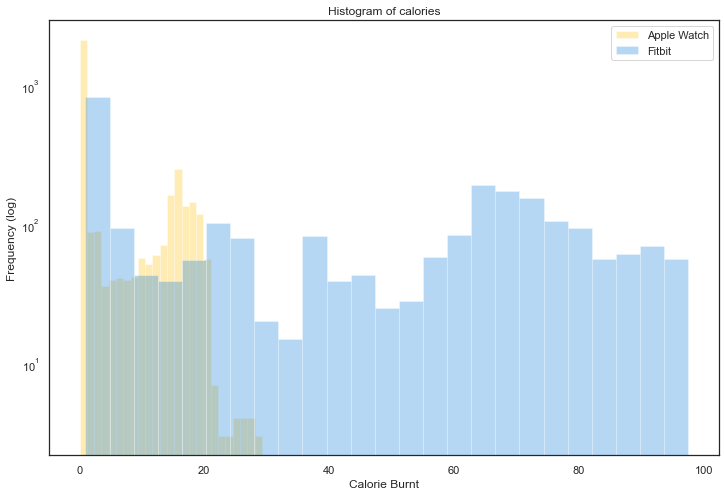

In [14]:
df_aw = df[df['device']=='Apple Watch']
df_fb = df[df['device']=='Fitbit']
plt.figure(figsize=(12,8))
plt.hist(df_aw['calories'],bins=25, color='#FFC20A',alpha=0.3, label='Apple Watch')
plt.hist(df_fb['calories'],bins=25, color='#0C7BDC',alpha=0.3, label='Fitbit')
plt.xlabel('Calorie Burnt')
plt.ylabel('Frequency (log)')
plt.yscale('log')
plt.title('Histogram of calories')
plt.legend()


## Combination of Boxplot and Swarm plot for visualizing heart rate across activities
We later decided that this chart was too cluttered and hence excluded it from our report. We replaced it with violin charts instead.

<AxesSubplot:xlabel='activity', ylabel='activity_heart_rate'>

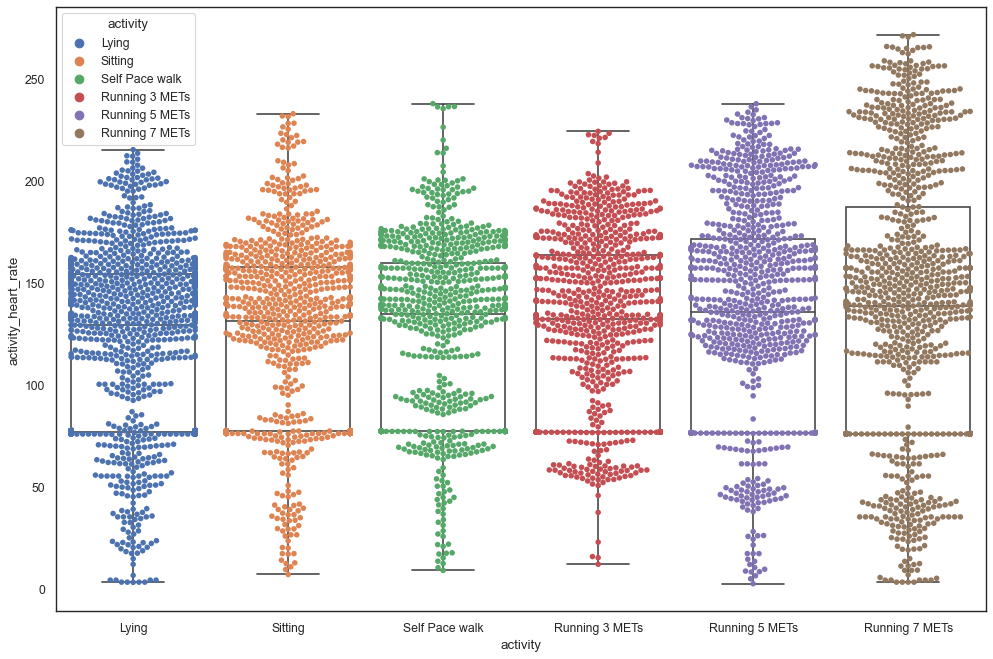

In [15]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10), dpi=80)

sns.boxplot(data=df, x="activity", y="activity_heart_rate",boxprops={'facecolor':'None'})
sns.swarmplot(data=df, x="activity", y="activity_heart_rate", hue='activity')

## Violin Plot
## Violin plot to visualize the distribution of calories burnt for apple and fitbit watches across each activity

(0.0, 105.0)

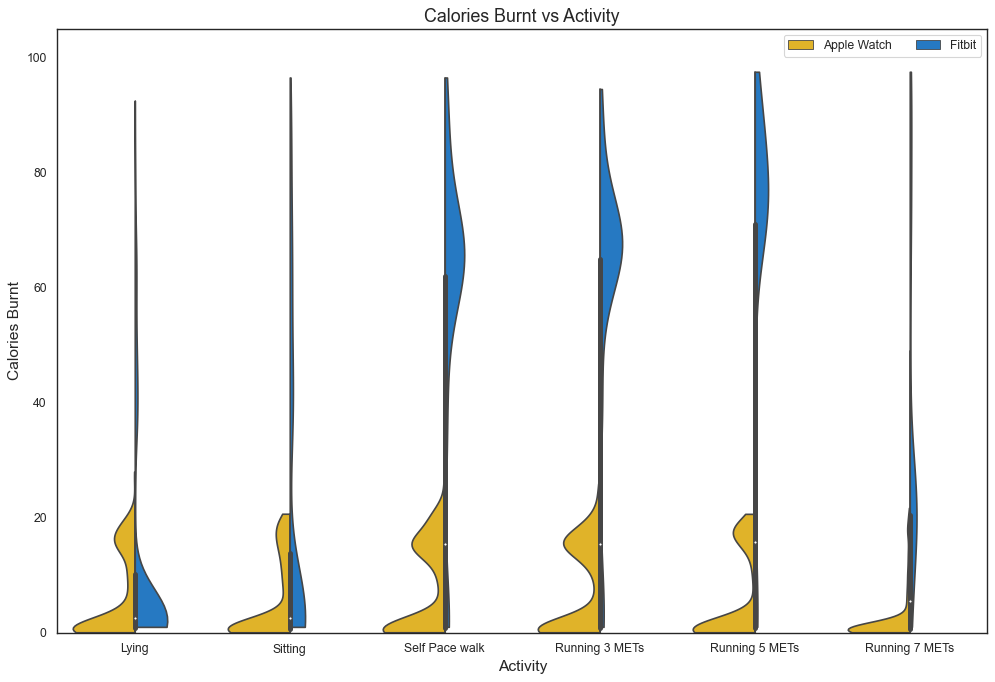

In [16]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10), dpi=80)
sns.violinplot(data=df,  x="activity", y="calories", hue="device", split=True, cut=0, palette=['#FFC20A','#0C7BDC'])
plt.title("Calories Burnt vs Activity", size=16)
plt.legend(loc='upper right', ncol=2)
plt.xlabel("Activity", size=14)
plt.ylabel("Calories Burnt", size = 14)
plt.ylim([0,105])

## Violin plot to visualize the distribution of heart rate for apple and fitbit watches across each activity

(-0.5, 5.5)

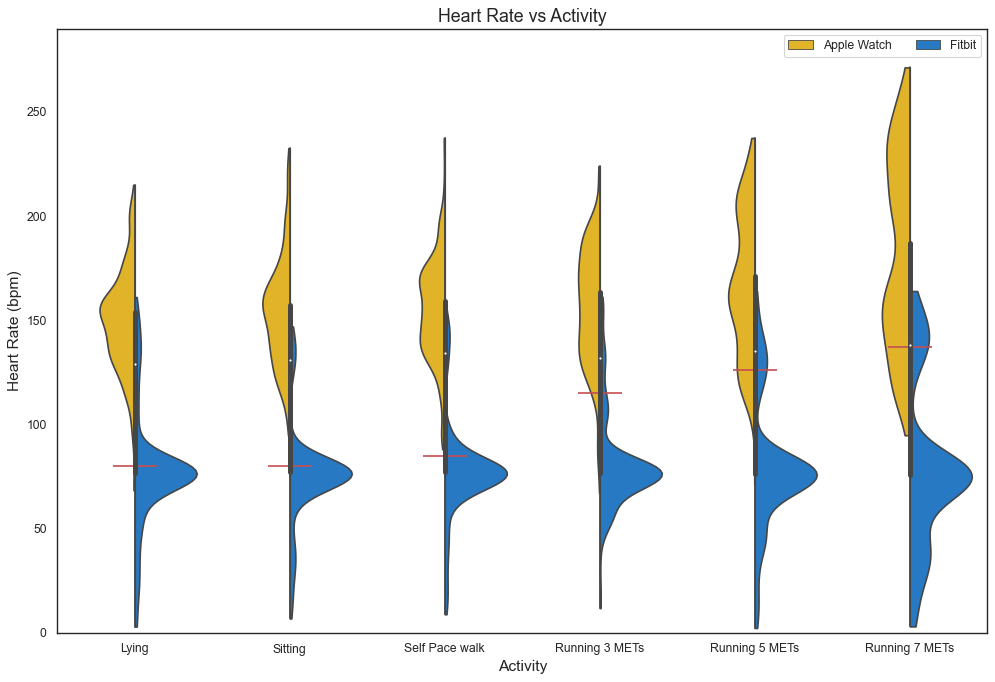

In [17]:
import warnings
warnings.filterwarnings("ignore")
activities_list = df['activity'].unique().tolist()
plt.figure(figsize=(15, 10), dpi=80)
sns.violinplot(data=df,  x="activity", y="activity_heart_rate", hue="device", split=True, cut=0, palette=['#FFC20A','#0C7BDC'])
plt.scatter(activities_list,[80,80,85,115,126,137],marker='_',s=1500,c='r')
plt.title("Heart Rate vs Activity", size=16)
plt.legend(loc='upper right', ncol=2)
plt.xlabel("Activity", size=14)
plt.ylabel("Heart Rate (bpm)", size = 14)
plt.ylim([0,290])
plt.xlim(-0.5,5.5)

## 3. Is there a significant difference in the calories burnt when comparing 3-meter and 7-meter running?

In [18]:
new_df = df[(df['activity']=='Running 3 METs' )| (df['activity']=='Running 7 METs')]

Text(0.5, 1.0, 'Calories Burnt for 3m vs 7m running on Apple Watches')

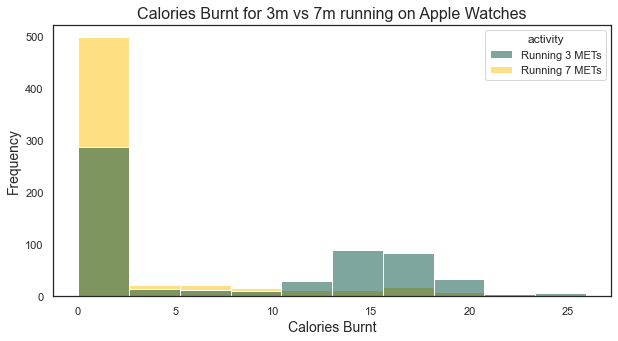

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(x='calories',data=new_df[new_df['device']=='Apple Watch'], hue='activity',bins=10,  palette=['#004D40','#FFC107'])
plt.xlabel("Calories Burnt", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Calories Burnt for 3m vs 7m running on Apple Watches", size=16)

Text(0.5, 1.0, 'Calories Burnt for 3m vs 7m running on Fitbits')

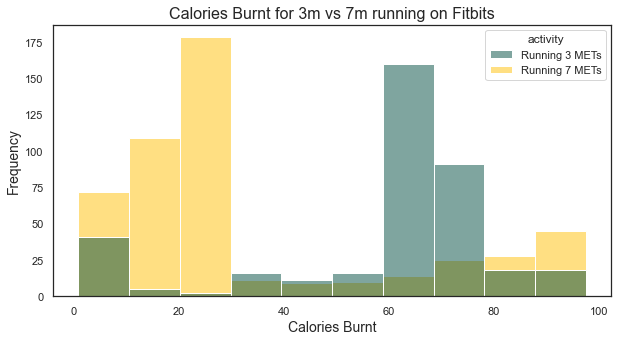

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x='calories',data=new_df[new_df['device']=='Fitbit'], hue='activity',bins=10,  palette=['#004D40','#FFC107'])
plt.xlabel("Calories Burnt", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Calories Burnt for 3m vs 7m running on Fitbits", size=16)

# Number of steps recorded for each activity
We decided to use a boxplot instead for each device to analyse this variable.

<AxesSubplot:xlabel='activity', ylabel='steps'>

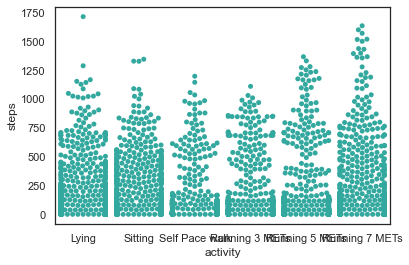

In [21]:
sns.swarmplot(data=df, x="activity", y="steps", color = '#32a89e')

## Visualizing the steps recorded for each activity

Text(0.5, 1.0, 'Steps recorded for each activity on Apple watches')

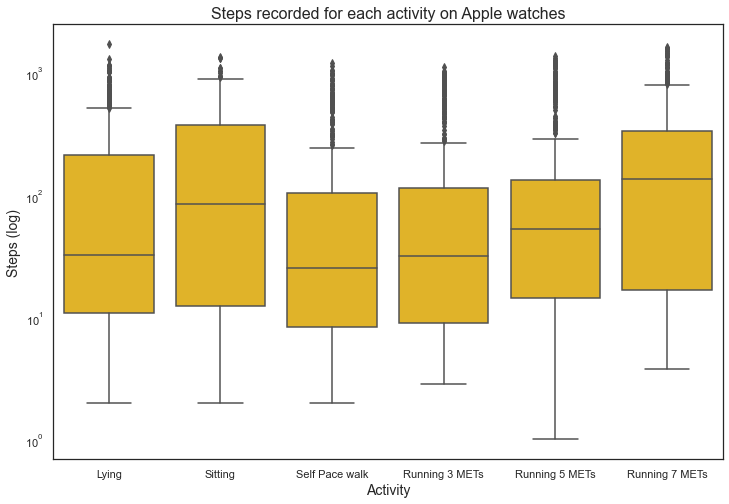

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_aw, x="activity", y="steps", color = '#FFC20A')
plt.yscale("log")
plt.xlabel("Activity", size=14)
plt.ylabel("Steps (log)", size=14)
plt.title("Steps recorded for each activity on Apple watches", size=16)

Text(0.5, 1.0, 'Steps recorded for each activity on Fitbit watches')

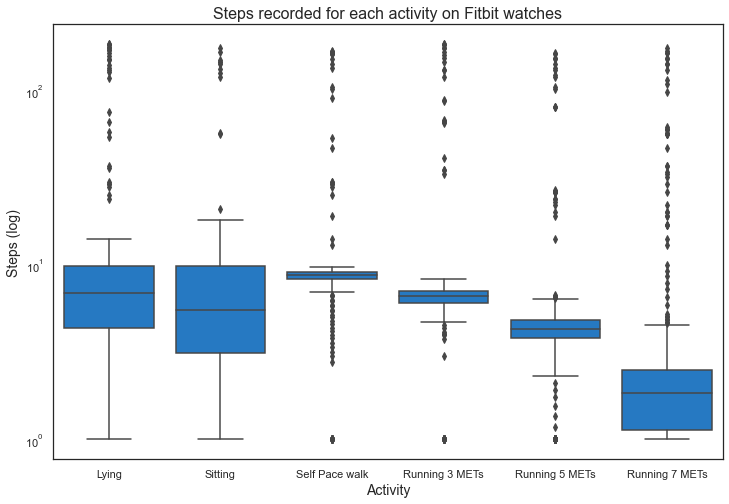

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_fb, x="activity", y="steps", color = '#0C7BDC', order=['Lying','Sitting','Self Pace walk','Running 3 METs','Running 5 METs','Running 7 METs'])
plt.yscale("log")
plt.xlabel("Activity", size=14)
plt.ylabel("Steps (log)", size=14)
plt.title("Steps recorded for each activity on Fitbit watches", size=16)

## 4. Can we visually explore the difference among various categories such as male vs female, among different age groups and for different BMI classes.

### Visualize the similarity in heart rate and calories burnt for male and female across each activity

<Figure size 864x576 with 0 Axes>

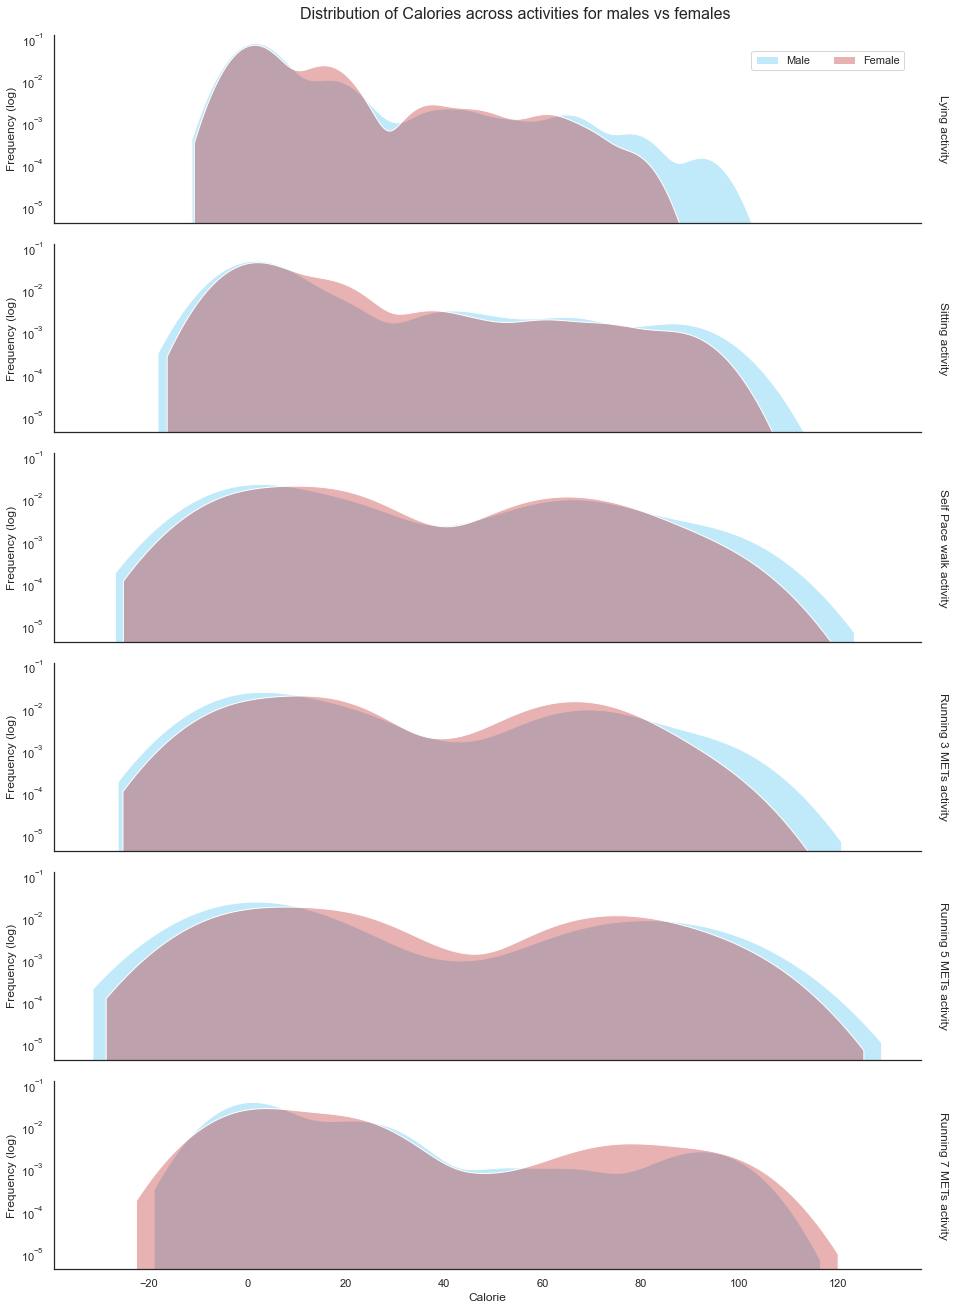

In [24]:
plt.figure(figsize=(12,8))
d = {  'color':['#2FB9EF','#B90000'],'alpha':[0.3,0.3]}
sns.set(font_scale=1)
sns.set_theme(style='white')

g = sns.FacetGrid(df, row='activity', hue='gender', hue_kws=d, margin_titles=True,height=3, aspect= 4.5)
g.map(sns.kdeplot, "calories", multiple="stack",edgecolor=None)
g.add_legend(labels=['Male','Female'])
g.set(yscale="log")
g.fig.suptitle('Distribution of Calories across activities for males vs females', y=1.01, size=16)

sns.move_legend(g, "upper left",  bbox_to_anchor=(0.72,0.98), title=None, frameon=True, ncol=2)
g.set_axis_labels("Calorie", "Frequency (log)")
g.set_titles(row_template="{row_name} activity")

<Figure size 864x576 with 0 Axes>

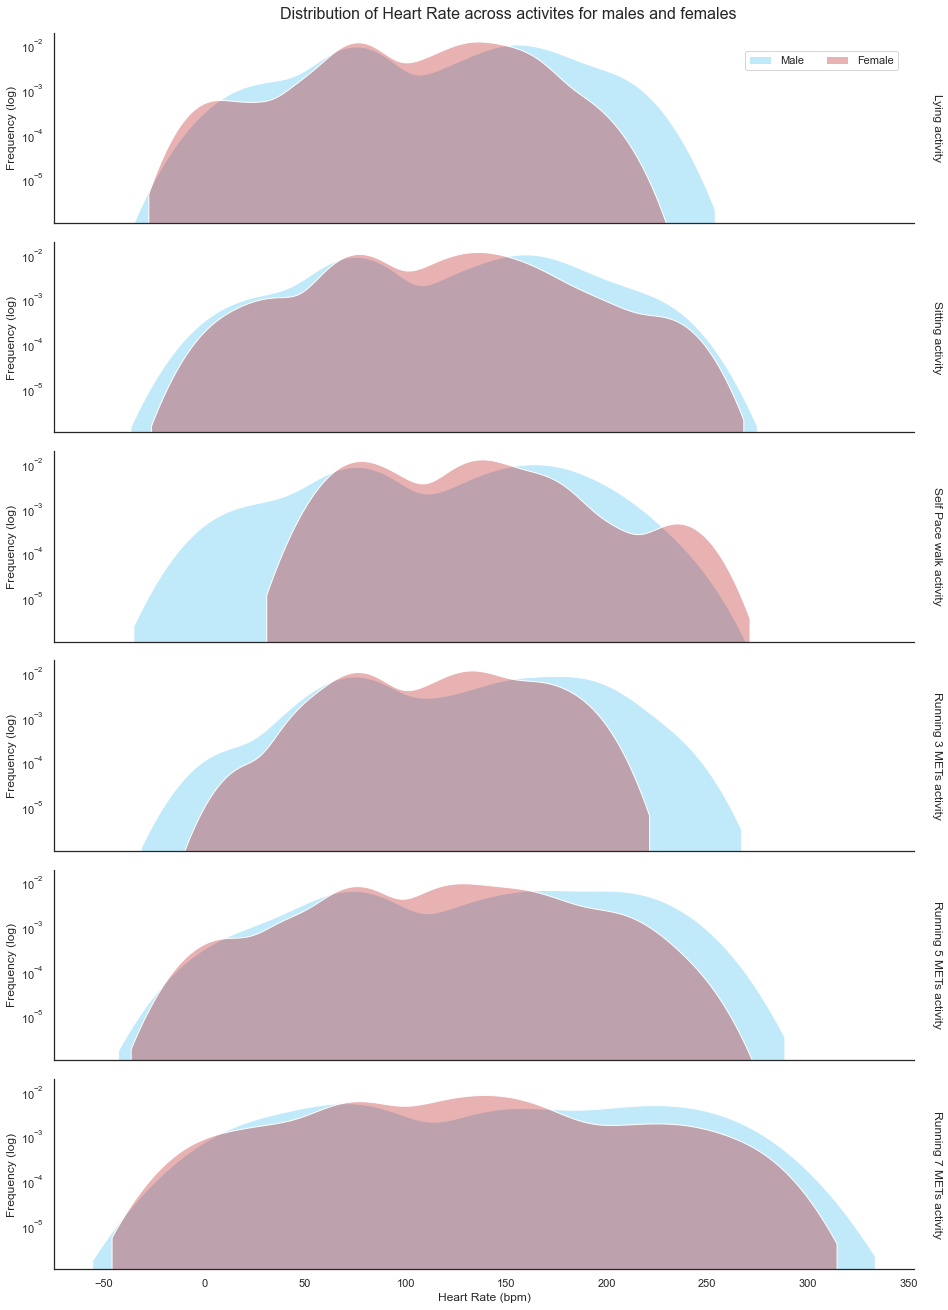

In [25]:
plt.figure(figsize=(12,8))
d = {  'color':['#2FB9EF','#B90000'],'alpha':[0.3,0.3]}
sns.set(font_scale=1)
sns.set_theme(style='white')

g = sns.FacetGrid(df, row='activity', hue='gender', hue_kws=d, margin_titles=True,height=3, aspect= 4.5)
g.map(sns.kdeplot, "activity_heart_rate",multiple="stack",edgecolor=None)
g.add_legend(labels=['Male','Female'])
g.set( yscale="log")
g.fig.suptitle('Distribution of Heart Rate across activites for males and females', y=1.01, size=16)

sns.move_legend(g, "upper left",  bbox_to_anchor=(0.72,0.98), title=None, frameon=True, ncol=2)
g.set_axis_labels("Heart Rate (bpm)", "Frequency (log)")
g.set_titles(row_template="{row_name} activity")

### Box plot to visualize the Heart Rate for each activity for both male and female

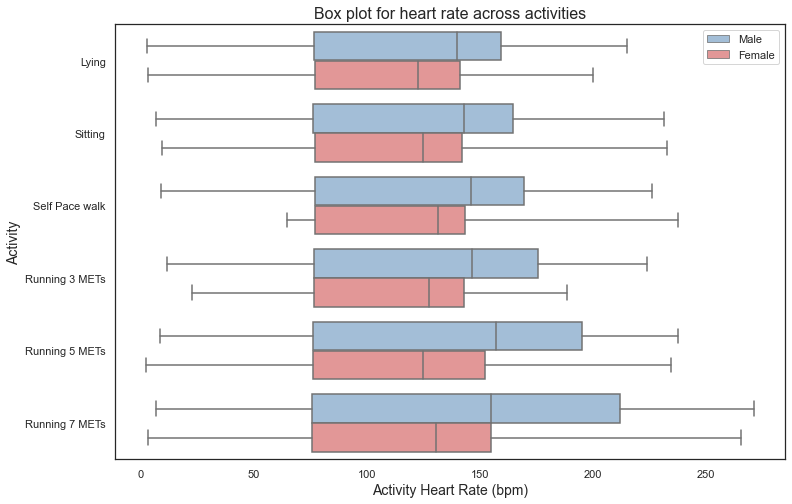

In [26]:
plt.figure(figsize=(12,8))

ax=sns.boxplot(data=df, y="activity", x="activity_heart_rate", hue="gender", palette={0:'#9ABFE0',1:'#EF8A8A'},boxprops=dict(alpha=1) )

plt.title("Box plot for heart rate across activities", size=16)
plt.xlabel("Activity Heart Rate (bpm)", size =14)
plt.ylabel("Activity", size =14)

handles, _ = ax.get_legend_handles_labels()         
ax.legend(handles, ["Male", "Female"], loc="best")


### Box plot to visualize the Calorie for each activity for both male and female

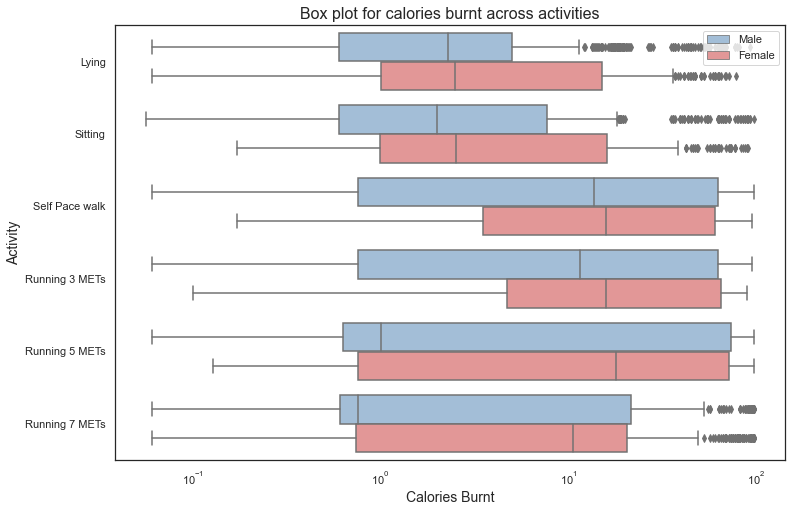

In [27]:
plt.figure(figsize=(12,8))

ax=sns.boxplot(data=df, y="activity", x="calories", hue="gender", palette={0:'#9ABFE0',1:'#EF8A8A'} )
sns.move_legend(ax, "upper left",  bbox_to_anchor=(0.92,1.05), title='gender', frameon=True, ncol=1)
plt.title("Box plot for calories burnt across activities", size=16)
plt.xscale("log")
plt.xlabel("Calories Burnt", size =14)
plt.ylabel("Activity", size =14)
handles, _ = ax.get_legend_handles_labels()         
ax.legend(handles, ["Male", "Female"], loc="upper right")



### Analyze the proportion of male and female for each BMI category

In [28]:
weight = df['weight']
height = df['height']
df['bmi'] = df['weight']/(df['height']*0.01)**2
df['bmi_group'] = 'Obese'
df.loc[df['bmi'] < 18.5, 'bmi_group'] = 'Underweight' 
df.loc[(df['bmi'] >=18.5) & (df['bmi']<25), 'bmi_group'] = 'Normal' 
df.loc[(df['bmi'] >=25) & (df['bmi']<30), 'bmi_group'] = 'Overweight' 
df['gender_class']=df['gender'].apply(lambda x: 'Female' if x==1 else 'Male')
df.head()

X1  age  gender  height  weight      steps  heart_rate   calories  \
0   1   20       1   168.0    65.4  10.771429   78.531302   0.344533   
1   2   20       1   168.0    65.4  11.475325   78.453390   3.287625   
2   3   20       1   168.0    65.4  12.179221   78.540825   9.484000   
3   4   20       1   168.0    65.4  12.883117   78.628260  10.154556   
4   5   20       1   168.0    65.4  13.587013   78.715695  10.825111   

   distance  entropy_heart  ...  norm_heart  intensity_karvonen  \
0  0.008327       6.221612  ...   19.531302            0.138520   
1  0.008896       6.221612  ...   19.453390            0.137967   
2  0.009466       6.221612  ...   19.540825            0.138587   
3  0.010035       6.221612  ...   19.628260            0.139208   
4  0.010605       6.221612  ...   19.715695            0.139828   

   sd_norm_heart  steps_times_distance       device  activity  \
0       1.000000              0.089692  Apple Watch     Lying   
1       1.000000              0.102088  Apple Watch     Lying   
2       1.000000              0.115287  Apple Watch     Lying   
3       1.000000              0.129286  Apple Watch     Lying   
4       0.241567              0.144088  Apple Watch     Lying   

   activity_heart_rate        bmi bmi_group  gender_class  
0           137.531302  23.171769    Normal        Female  
1           137.453390  23.171769    Normal        Female  
2           137.540825  23.171769    Normal        Female  
3           137.628260  23.171769    Normal        Female  
4           137.715695  23.171769    Normal        Female  

[5 rows x 23 columns]

In [29]:
grp = df.groupby(['bmi_group','gender_class'])

In [30]:
prop_cnt_df  = grp.count()[['bmi']].rename(columns={"bmi":"count"}).reset_index()
prop_cnt_df['center'] = "BMI"

In [31]:
import plotly.express as px
fig1 = px.sunburst(prop_cnt_df, path=["center","bmi_group", "gender_class",], 
                  values='count',title="Proportion of Males Vs Females across BMI groups")
fig1.update_layout(
    title={
        'text': "Proportion of males vs females across BMI groups",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig1.show()

Since using a donut chart are hard to interpret the exact values, we corrected our mistake by plotting a stacked bar plot.  
### Stacked bar plot to analyze the proportion of male and female for each BMI category

Text(0.5, 1.0, 'Observation count across BMI groups for males and females')

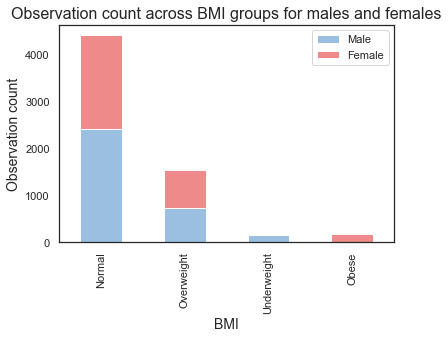

In [32]:
df_plot = pd.DataFrame({'Male': [2412, 721, 146,0],'Female': [1994, 822, 0, 169]}, 
                        index=['Normal','Overweight','Underweight','Obese'])
df_plot.plot(kind='bar', stacked=True, color=['#9ABFE0','#EF8A8A'])
plt.xlabel("BMI", size = 14)
plt.ylabel("Observation count", size=14)
plt.title("Observation count across BMI groups for males and females", size= 16)


### Visualizing how Median BMI varies across age groups for male and female

Text(0.5, 1.0, 'Median BMI across age groups for males and females')

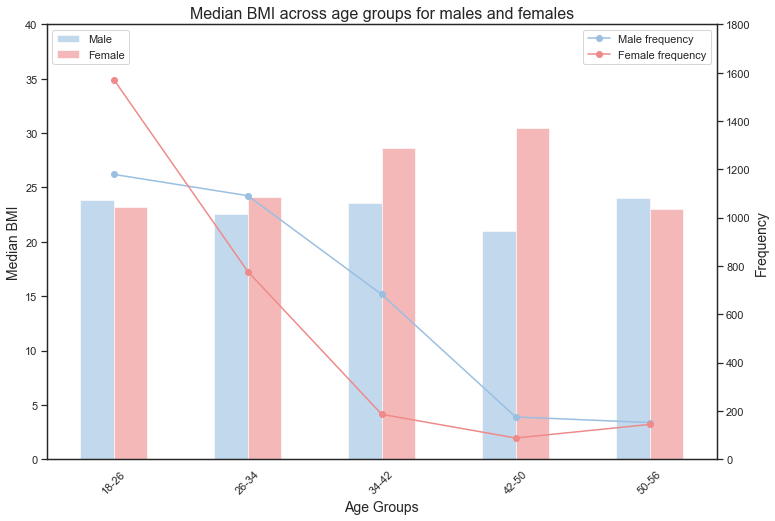

In [33]:
bins = [18, 26, 34, 42, 50, 56]
labels = ['18-26','26-34','34-42','42-50','50-56']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.set_theme(style='white')
fig1,ax1 = plt.subplots(figsize=(12,8))
df.groupby(['Age_Group', 'gender'])['bmi'].median().unstack(level=-1).plot(kind='bar',alpha=0.6,rot=45, color={'#EF8A8A','#9ABFE0'},ax=ax1)
ax2 = ax1.twinx()
bins = [18, 26, 34, 42, 50, 56]
labels = ['18-26','26-34','34-42','42-50','50-56']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

df.groupby(['Age_Group', 'gender'])['bmi'].count().unstack(level=-1).plot(kind='line',marker='o',rot=45, color={'#EF8A8A','#9ABFE0'},ax=ax2)
ax2.set_ylabel("Frequency", size =14)
ax1.set_ylabel("Median BMI", size=14)
ax1.set_xlabel("Age Groups", size=14)
ax1.legend(['Male','Female'],loc='upper left')
ax2.legend(['Male frequency','Female frequency'],loc='upper right')
ax1.set_ylim([0,40])
ax2.set_ylim([0,1800])
ax1.grid(False)
ax2.grid(False)
plt.title("Median BMI across age groups for males and females", size= 16)
#7EB5AF'

### Visualizing how median calories burnt varies across age groups for male and female

In [34]:
vals = df.groupby(['activity', 'gender']).median()

Text(0.5, 1.0, 'Median calorie burnt across activities for males and females')

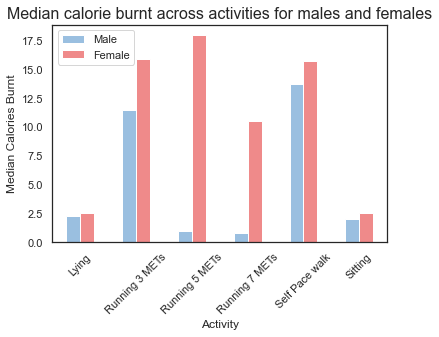

In [35]:
df.groupby(['activity', 'gender'])['calories'].median().unstack(level=-1).plot(kind='bar',rot=45, color={'#EF8A8A','#9ABFE0'})
plt.ylabel("Median Calories Burnt")
plt.legend(['Male','Female'])
plt.xlabel('Activity')
plt.title("Median calorie burnt across activities for males and females", size= 16)


### Lollipop visualization for median heart rate between male and female

In [36]:
val_male = df.groupby(['activity']).apply(lambda x: x[x['gender'] == 0]['activity_heart_rate'].median()).reset_index().rename(columns={'activity':'activity', 0:'Male'})
val_1 = df.groupby(['activity']).apply(lambda x: x[x['gender'] == 1]['activity_heart_rate'].median()).reset_index().rename(columns={'activity':'activity', 0:'Female'})
val_1['Male'] = val_male['Male']
val_1

activity      Female        Male
0           Lying  122.739710  139.888889
1  Running 3 METs  127.499838  146.315572
2  Running 5 METs  124.661783  157.200000
3  Running 7 METs  130.466397  154.963121
4  Self Pace walk  131.333333  146.083963
5         Sitting  124.750000  142.846154

Text(0, 0.5, 'Activity')

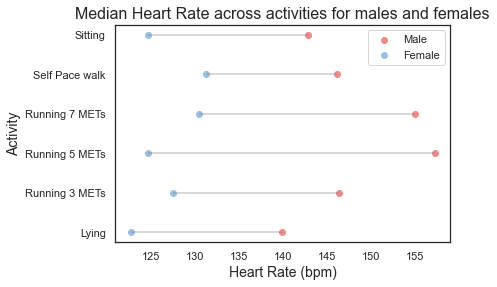

In [37]:
plt.hlines(y=val_1.activity, xmin=val_1.Male, xmax=val_1.Female, color='grey', alpha=0.4)
plt.scatter(val_1.Male, val_1.activity, color='#EF8A8A', alpha=1, label='Male')
plt.scatter(val_1.Female, val_1.activity, color='#9ABFE0', alpha=1 , label='Female')
plt.legend()
plt.title("Median Heart Rate across activities for males and females", size=16)
plt.xlabel("Heart Rate (bpm)",size=14)
plt.ylabel("Activity", size=14)

## Finding if there is a significant correlation between heart rate and calories burnt

In [38]:
corr_df = df.corr()[['heart_rate','distance','calories','weight','height']]
corr_df=corr_df.loc[['heart_rate','distance','calories','weight','height']]
corr_df

heart_rate  distance  calories    weight    height
heart_rate    1.000000 -0.068879 -0.141972 -0.064317 -0.123519
distance     -0.068879  1.000000  0.255145 -0.072294 -0.091422
calories     -0.141972  0.255145  1.000000 -0.023612  0.034447
weight       -0.064317 -0.072294 -0.023612  1.000000  0.693504
height       -0.123519 -0.091422  0.034447  0.693504  1.000000

Text(0.5, 1.0, 'Correlation heatmap for features')

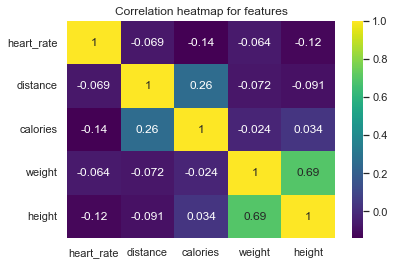

In [39]:
sns.heatmap(corr_df, annot=True,  cmap="viridis")
plt.title('Correlation heatmap for features')

We see a weak negative correlation between heart rate and calories burnt which is odd

Link to Interactive Tableau Visualization:
https://public.tableau.com/views/DV_Project_16695919079250/Calrorie_HR_dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link